In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sn
import pandas as pd
import numpy as np
import csv

In [2]:
df = pd.read_csv('error_results.csv')

In [3]:
df.value_counts('data_dependencies')

data_dependencies
0    54
1    42
2    16
3    11
4     4
5     1
7     1
8     1
Name: count, dtype: int64

In [4]:
(df.count() - 54) / df.count()

target               0.584615
query                0.584615
size                 0.584615
data_dependencies    0.584615
max_depth            0.584615
keyword_count        0.584615
union_count          0.584615
all_count            0.584615
optional_count       0.584615
match_count          0.584615
foreach_count        0.584615
unwind_count         0.584615
as_count             0.584615
merge_count          0.584615
on_count             0.584615
create_count         0.584615
set_count            0.584615
detach_count         0.584615
delete_count         0.584615
remove_count         0.584615
call_count           0.584615
yield_count          0.584615
with_count           0.584615
return_count         0.584615
distinct_count       0.584615
order_count          0.584615
by_count             0.584615
l_skip_count         0.584615
limit_count          0.584615
ascending_count      0.584615
asc_count            0.584615
descending_count     0.584615
desc_count           0.584615
where_coun

In [5]:
df['size'].max()

np.int64(249)

In [6]:
df[df['size'] <= 120].count()

target               112
query                112
size                 112
data_dependencies    112
max_depth            112
keyword_count        112
union_count          112
all_count            112
optional_count       112
match_count          112
foreach_count        112
unwind_count         112
as_count             112
merge_count          112
on_count             112
create_count         112
set_count            112
detach_count         112
delete_count         112
remove_count         112
call_count           112
yield_count          112
with_count           112
return_count         112
distinct_count       112
order_count          112
by_count             112
l_skip_count         112
limit_count          112
ascending_count      112
asc_count            112
descending_count     112
desc_count           112
where_count          112
or_count             112
xor_count            112
and_count            112
not_count            112
starts_count         112
ends_count           112


In [7]:
markers = {
    'neo4j': '.',
    'redisgraph': 'x',
    'falkordb': 'x',
    'memgraph': 'P'
}

In [8]:
def assign_group(i):
    if i == 0:
        return 0
    if i == 1:
        return 1
    if i == 2:
        return 2
    if i == 3:
        return 3
    return 4

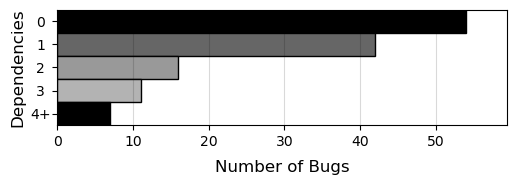

In [9]:
plt.style.use('grayscale')

plt.figure(figsize=[5.8, 1.5])

amounts = [0,0,0,0,0]

for index, row in df.iterrows():
    amounts[assign_group(row['data_dependencies'])] += 1

for i in range(4,-1,-1):
    plt.barh([i], amounts[4-i], height=1, edgecolor='#000')

plt.gcf().set_facecolor('white')

plt.ylabel('Dependencies', size=12)
plt.xlabel('Number of Bugs', size=12, labelpad=8)

ax = plt.gca()

plt.tick_params(axis='x', which='minor')
ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.yticks([4,3,2,1,0],['0','1','2','3', '4+'])

plt.tick_params(axis='x', which='minor')

for label in ax.get_yticklabels():
    label.set_horizontalalignment('center')
    label.set_x(-.015)

plt.margins(0.1, 0)

plt.grid(True, axis='x', which='both', alpha=0.15)

plt.savefig('dependencies.pdf', format='pdf', bbox_inches='tight')

In [11]:
amounts

[54, 42, 16, 11, 7]

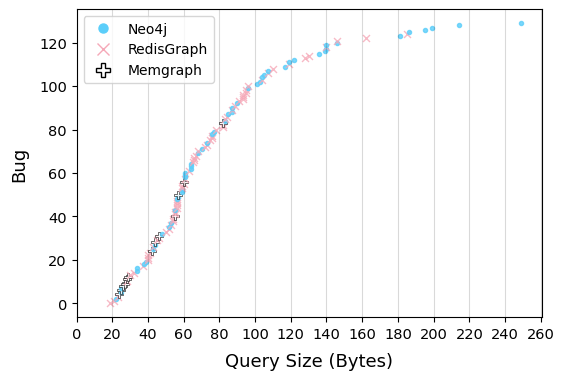

In [10]:
fig = plt.figure(figsize=[6.0, 4])


i = 0
for index, row in df.sort_values('size').iterrows():
    plt.scatter(
        row['size'],
        i,
        color={
    'neo4j': '#5BCEFA',
    'redisgraph': '#F5A9B8',
    'falkordb': '#F5A9B8',
    'memgraph': '#FFFFFF'
}[row['target']],
        marker=markers[row['target']],
        edgecolor=('k' if row['target'] == 'memgraph' else None),
        linewidth=(0.5 if row['target'] == 'memgraph' else 1),
        alpha=0.8,
        s=(35 if row['target'] == 'neo4j' else (35 if row['target'] == 'memgraph' else 25))
    )
    i += 1


plt.gcf().set_facecolor('white')


neo4j_marker = mlp.lines.Line2D([0], [0], label='Neo4j', marker=markers['neo4j'], markersize=13, 
         markeredgecolor=None, color='#5BCEFA', linestyle='')
redisgraph_marker = mlp.lines.Line2D([0], [0], label='RedisGraph', marker=markers['redisgraph'], markersize=8, 
         markeredgecolor=None, color='#F5A9B8', linestyle='')
apache_age_marker = mlp.lines.Line2D([0], [0], label='Memgraph', marker=markers['memgraph'], markersize=10, 
         markeredgecolor='k', markerfacecolor='#FFFFFF', linestyle='')

plt.legend(handles=[neo4j_marker, redisgraph_marker, apache_age_marker])

plt.xlabel('Query Size (Bytes)', size=13, labelpad=8)
plt.ylabel('Bug', size=13, labelpad=8)

ax = plt.gca()

plt.tick_params(axis='y', which='minor')
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.tick_params(axis='y', which='minor')

plt.xticks(np.arange(0, 261, step=20), size=10.5)
plt.yticks(size=10.5)

plt.grid(True, axis='x', which='both', alpha=0.15)



plt.savefig('size.pdf', format='pdf', bbox_inches='tight')

## 